# Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gdown
import zipfile
from tqdm import tqdm 

In [2]:
gdown.download('https://drive.google.com/uc?export=download&id=1naL2i9KKcx7hd7oCEQIVStQjSH6j9gDW', 'dataset.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1naL2i9KKcx7hd7oCEQIVStQjSH6j9gDW
To: /content/dataset.zip
100%|██████████| 3.00G/3.00G [00:40<00:00, 74.9MB/s]


'dataset.zip'

In [3]:
with zipfile.ZipFile('dataset.zip', mode='r') as zip_file:
    for zf in tqdm(zip_file.infolist(), desc="Extracting"):
        try:
            zip_file.extract(zf)                
        except Exception as e:
            print(e)
zip_file.close()

Extracting: 100%|██████████| 2946/2946 [01:07<00:00, 43.54it/s]


# Preprocessing Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
shutil.move('/content/content/content/dataset', '/content/')

'/content/dataset'

In [7]:
shutil.rmtree('/content/content')

## Split Data

In [8]:
def split_data(data, train_size=0.8, random_seed=42):

    """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
    dengan urutan hasil return : data_train, data_validasi"""
    np.random.seed(int(random_seed))
    test_size=1-train_size
    panjang_train = int(train_size*len(data))
    panjang_val = int(test_size*len(data))
    selisih =len(data) - (panjang_train + panjang_val)
    # print(len(data), " - ( ",panjang_train, " + ", panjang_val," ) = ",selisih)
    if selisih > 0:
        panjang_train +=selisih
    
    data_train = []
    #memilih data train dari data
    while len(data_train) != panjang_train:
        bantu = np.random.randint(0, (len(data)-1))
        if data[bantu] not in data_train:
            data_train.append(data[bantu])
            del data[bantu]
     
    #Sisanya Dicopy kedalam Train
    data_validasi = data.copy()
    del data
     
    print("\nPanjang train : ",panjang_train)
    print("Panjang validasi : ",panjang_val,"\n")
    return data_train, data_validasi

In [9]:
#Selanjutnya pindahkan ke folder terpisah

#Membuat fungsi untuk membuat folder penyimpanan dan memindahkan data yang telah dipisahkan kedalam folder tersebut
def move(data_train, data_val, data_path, train_path, val_path):
    """Fungsi ini untuk membuat folder penyimpanan dan 
    memasukan data yang telah dipisahkan dengan folder tersebut"""
    
    #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
    if not (os.path.exists(train_path) and os.path.exists(val_path)):
        os.makedirs(train_path)
        os.makedirs(val_path)
    else:
        print('Folder Sudah ada')
    
    #memindahkan ke folder terpisah
    for i in range(len(data_train)):
        shutil.move(os.path.join(data_path, data_train[i]), os.path.join(train_path, data_train[i]))
    
    #memindahkan ke folder terpisah
    for i in range(len(data_val)):
        shutil.move(os.path.join(data_path, data_val[i]), os.path.join(val_path, data_val[i]))

In [10]:
def split_and_move_data(path='', random_seed=42, train_size=0.8):
    path_dict = {}
    for i in os.listdir(path):
        path_dict[i] = os.listdir(os.path.join(path, i))
        print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))
      
    dict_train_test = {}
    for cls in path_dict.keys():
        dict_train_test[cls] = split_data(path_dict[cls],random_seed=random_seed,train_size=train_size)
     
    for cls in path_dict.keys():
        move(
           data_train =  dict_train_test[cls][0],
           data_val = dict_train_test[cls][1],
           data_path = os.path.join(path, cls),
           train_path = os.path.join(os.path.join(path,'train'),cls),
           val_path = os.path.join(os.path.join(path,'test'),cls)
        )
        shutil.rmtree(os.path.join(path, cls))
    len_train = 0
    len_test = 0
    train = os.path.join(path,'train')
    test = os.path.join(path,'test')
    for cls in os.listdir(train):
        len_train += len(os.listdir((os.path.join(train,cls))))
        len_test += len(os.listdir((os.path.join(test,cls))))
         
     
    print('train : {} data'.format(len_train))
    print('test  : {} data'.format(len_test))      

In [11]:
split_and_move_data('/content/dataset', train_size=0.85)

bika_ambon => sebanyak  270
putu_ayu => sebanyak  266
cucur => sebanyak  240
klepon => sebanyak  234
kue_sus => sebanyak  198
kue_pukis => sebanyak  304
kue_cubit => sebanyak  238
kue_lupis => sebanyak  317
dadar_gulung => sebanyak  310
onde_onde => sebanyak  287
data_selain_kue => sebanyak  270

Panjang train :  230
Panjang validasi :  40 


Panjang train :  227
Panjang validasi :  39 


Panjang train :  204
Panjang validasi :  36 


Panjang train :  199
Panjang validasi :  35 


Panjang train :  169
Panjang validasi :  29 


Panjang train :  259
Panjang validasi :  45 


Panjang train :  203
Panjang validasi :  35 


Panjang train :  270
Panjang validasi :  47 


Panjang train :  264
Panjang validasi :  46 


Panjang train :  244
Panjang validasi :  43 


Panjang train :  230
Panjang validasi :  40 

train : 2499 data
test  : 435 data


# Data Generator

In [12]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      brightness_range=[0.6, 1.5],
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255
)

In [13]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical',
    shuffle=True
)


test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=434,
    class_mode='categorical'
)

Found 2497 images belonging to 11 classes.
Found 435 images belonging to 11 classes.


In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [15]:
model = load_model('/content/drive/MyDrive/Orbit_final_project/bestModel9/checkpoint_34')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (Function  (None, 1024)             3228864   
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_18 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

In [ ]:
model.layers[0].trainable = False
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
def checkpoint(filepath, monitor='val_loss'):
    return ModelCheckpoint(filepath=filepath, monitor=monitor, verbose=1, save_best_only=False, save_freq='epoch')

In [ ]:
model_checkpoint = checkpoint('/content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_{epoch:02d}', monitor='val_accuracy',)
learningrate_decay = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                                       patience=10, verbose=1, min_lr=1e-20)
earlystopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1)
train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = test_generator.n // test_generator.batch_size
print(train_steps_per_epoch, val_steps) 

19 1


# Transfer Learning

In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=100,
          verbose=1, callbacks=[model_checkpoint, learningrate_decay, earlystopping],
          steps_per_epoch=train_steps_per_epoch, validation_steps=val_steps)

Epoch 1/100
19/19 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9696
Epoch 00001: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_01


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_01/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_01/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 225s 11s/step - loss: 0.2544 - accuracy: 0.9696 - val_loss: 0.2253 - val_accuracy: 0.9747 - lr: 1.0000e-04
Epoch 2/100
19/19 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9705
Epoch 00002: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_02


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_02/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_02/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 209s 11s/step - loss: 0.2450 - accuracy: 0.9705 - val_loss: 0.2259 - val_accuracy: 0.9770 - lr: 1.0000e-04
Epoch 3/100
19/19 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9683
Epoch 00003: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_03


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_03/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_03/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 192s 10s/step - loss: 0.2571 - accuracy: 0.9683 - val_loss: 0.2201 - val_accuracy: 0.9747 - lr: 1.0000e-04
Epoch 4/100
19/19 [==============================] - ETA: 0s - loss: 0.2458 - accuracy: 0.9717
Epoch 00004: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_04


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_04/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_04/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 207s 11s/step - loss: 0.2458 - accuracy: 0.9717 - val_loss: 0.2161 - val_accuracy: 0.9793 - lr: 1.0000e-04
Epoch 5/100
19/19 [==============================] - ETA: 0s - loss: 0.2498 - accuracy: 0.9717
Epoch 00005: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_05


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_05/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_05/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 208s 11s/step - loss: 0.2498 - accuracy: 0.9717 - val_loss: 0.2184 - val_accuracy: 0.9793 - lr: 1.0000e-04
Epoch 6/100
19/19 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9764
Epoch 00006: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_06


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_06/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_06/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 209s 11s/step - loss: 0.2410 - accuracy: 0.9764 - val_loss: 0.2266 - val_accuracy: 0.9770 - lr: 1.0000e-04
Epoch 7/100
19/19 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9700
Epoch 00007: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_07


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_07/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_07/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


19/19 [==============================] - 193s 10s/step - loss: 0.2435 - accuracy: 0.9700 - val_loss: 0.2229 - val_accuracy: 0.9770 - lr: 1.0000e-04
Epoch 8/100
19/19 [==============================] - ETA: 0s - loss: 0.2337 - accuracy: 0.9764
Epoch 00008: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_08


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_08/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_08/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 193s 10s/step - loss: 0.2337 - accuracy: 0.9764 - val_loss: 0.2190 - val_accuracy: 0.9816 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 9/100
19/19 [==============================] - ETA: 0s - loss: 0.2557 - accuracy: 0.9654
Epoch 00009: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_09


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_09/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_09/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 207s 11s/step - loss: 0.2557 - accuracy: 0.9654 - val_loss: 0.2197 - val_accuracy: 0.9793 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 10/100
19/19 [==============================] - ETA: 0s - loss: 0.2448 - accuracy: 0.9709
Epoch 00010: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_10


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_10/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_10/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 193s 10s/step - loss: 0.2448 - accuracy: 0.9709 - val_loss: 0.2205 - val_accuracy: 0.9793 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 11/100
19/19 [==============================] - ETA: 0s - loss: 0.2396 - accuracy: 0.9708
Epoch 00011: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_11


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_11/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_11/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 194s 10s/step - loss: 0.2396 - accuracy: 0.9708 - val_loss: 0.2273 - val_accuracy: 0.9793 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 12/100
19/19 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9743
Epoch 00012: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_12


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_12/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_12/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 191s 10s/step - loss: 0.2416 - accuracy: 0.9743 - val_loss: 0.2253 - val_accuracy: 0.9770 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 13/100
19/19 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9793
Epoch 00013: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_13


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_13/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_13/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 190s 10s/step - loss: 0.2201 - accuracy: 0.9793 - val_loss: 0.2261 - val_accuracy: 0.9747 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 14/100
19/19 [==============================] - ETA: 0s - loss: 0.2334 - accuracy: 0.9720
Epoch 00014: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_14


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_14/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_14/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 192s 10s/step - loss: 0.2334 - accuracy: 0.9720 - val_loss: 0.2301 - val_accuracy: 0.9747 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 15/100
19/19 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.9696
Epoch 00015: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_15


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_15/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_15/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 205s 11s/step - loss: 0.2341 - accuracy: 0.9696 - val_loss: 0.2296 - val_accuracy: 0.9677 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 16/100
19/19 [==============================] - ETA: 0s - loss: 0.2281 - accuracy: 0.9776
Epoch 00016: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_16


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_16/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_16/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 192s 10s/step - loss: 0.2281 - accuracy: 0.9776 - val_loss: 0.2203 - val_accuracy: 0.9724 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 17/100
19/19 [==============================] - ETA: 0s - loss: 0.2380 - accuracy: 0.9738
Epoch 00017: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_17


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_17/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_17/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 206s 11s/step - loss: 0.2380 - accuracy: 0.9738 - val_loss: 0.2186 - val_accuracy: 0.9770 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 18/100
19/19 [==============================] - ETA: 0s - loss: 0.2191 - accuracy: 0.9802
Epoch 00018: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_18


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_18/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_18/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)



Epoch 00018: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
19/19 [==============================] - 191s 10s/step - loss: 0.2191 - accuracy: 0.9802 - val_loss: 0.2149 - val_accuracy: 0.9747 - lr: 1.0000e-04


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 19/100
19/19 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.9759
Epoch 00019: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_19


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_19/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_19/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 191s 10s/step - loss: 0.2280 - accuracy: 0.9759 - val_loss: 0.2144 - val_accuracy: 0.9793 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 20/100
19/19 [==============================] - ETA: 0s - loss: 0.2234 - accuracy: 0.9764
Epoch 00020: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_20


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_20/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_20/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 191s 10s/step - loss: 0.2234 - accuracy: 0.9764 - val_loss: 0.2154 - val_accuracy: 0.9793 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 21/100
19/19 [==============================] - ETA: 0s - loss: 0.2118 - accuracy: 0.9793
Epoch 00021: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_21


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_21/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_21/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 203s 11s/step - loss: 0.2118 - accuracy: 0.9793 - val_loss: 0.2174 - val_accuracy: 0.9724 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 22/100
19/19 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9721
Epoch 00022: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_22


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_22/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_22/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 206s 11s/step - loss: 0.2305 - accuracy: 0.9721 - val_loss: 0.2168 - val_accuracy: 0.9724 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 23/100
19/19 [==============================] - ETA: 0s - loss: 0.2143 - accuracy: 0.9785
Epoch 00023: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_23


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_23/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_23/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 206s 11s/step - loss: 0.2143 - accuracy: 0.9785 - val_loss: 0.2156 - val_accuracy: 0.9724 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 24/100
19/19 [==============================] - ETA: 0s - loss: 0.2170 - accuracy: 0.9780
Epoch 00024: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_24


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_24/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_24/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 207s 11s/step - loss: 0.2170 - accuracy: 0.9780 - val_loss: 0.2159 - val_accuracy: 0.9747 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 25/100
19/19 [==============================] - ETA: 0s - loss: 0.2327 - accuracy: 0.9721
Epoch 00025: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_25


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_25/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_25/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 206s 11s/step - loss: 0.2327 - accuracy: 0.9721 - val_loss: 0.2181 - val_accuracy: 0.9770 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 26/100
19/19 [==============================] - ETA: 0s - loss: 0.2335 - accuracy: 0.9747
Epoch 00026: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_26


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_26/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_26/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 190s 10s/step - loss: 0.2335 - accuracy: 0.9747 - val_loss: 0.2169 - val_accuracy: 0.9793 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 27/100
19/19 [==============================] - ETA: 0s - loss: 0.2260 - accuracy: 0.9738
Epoch 00027: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_27


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_27/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_27/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


19/19 [==============================] - 190s 10s/step - loss: 0.2260 - accuracy: 0.9738 - val_loss: 0.2149 - val_accuracy: 0.9747 - lr: 5.0000e-05


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


Epoch 28/100
19/19 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9755
Epoch 00028: saving model to /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_28


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_28/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Orbit_final_project/bestModel8/checkpoint_28/assets
/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)



Epoch 00028: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
19/19 [==============================] - 206s 11s/step - loss: 0.2274 - accuracy: 0.9755 - val_loss: 0.2139 - val_accuracy: 0.9770 - lr: 5.0000e-05
Epoch 00028: early stopping


/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


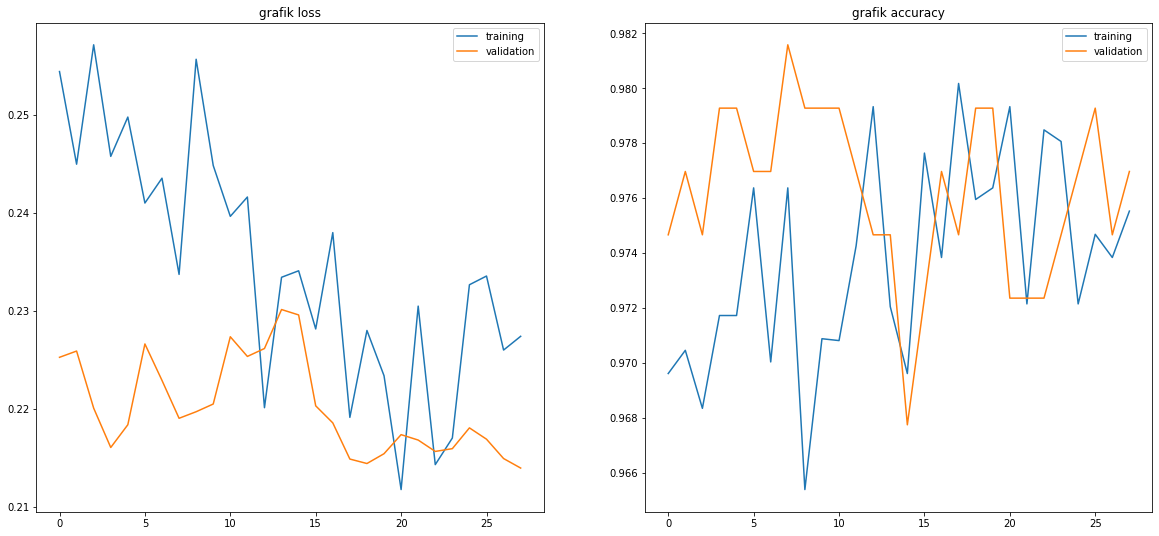

In [ ]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.title('grafik loss')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

plt.subplot(122)
plt.title('grafik accuracy')
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()